In [128]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

# Context

In [129]:
data = pd.read_csv("train.csv")

In [130]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14,C12239,S
1,1,0,3,"Bryan, Drew",male,NaN,0,0,27323,13.35,NaN,S
2,2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,NaN,S
3,3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,NaN,S
4,4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99995,1,2,"Bell, Adele",female,62.00,0,0,PC 15008,14.86,D17243,C
99996,99996,0,2,"Brown, Herman",male,66.00,0,0,13273,11.15,NaN,S
99997,99997,0,3,"Childress, Charles",male,37.00,0,0,NaN,9.95,NaN,S
99998,99998,0,3,"Caughlin, Thomas",male,51.00,0,1,458654,30.92,NaN,S


# Data quality assessment

In [131]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   PassengerId  100000 non-null  int64  
 1   Survived     100000 non-null  int64  
 2   Pclass       100000 non-null  int64  
 3   Name         100000 non-null  object 
 4   Sex          100000 non-null  object 
 5   Age          96708 non-null   float64
 6   SibSp        100000 non-null  int64  
 7   Parch        100000 non-null  int64  
 8   Ticket       95377 non-null   object 
 9   Fare         99866 non-null   float64
 10  Cabin        32134 non-null   object 
 11  Embarked     99750 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 9.2+ MB


### make a heatmap of non values:

<AxesSubplot:>

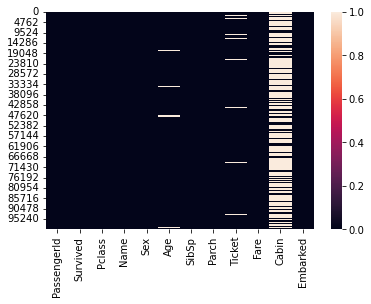

In [132]:
sns.heatmap(data.isna())

### percent of non value:

In [133]:
for col in data.columns:
    missing = np.mean(data[col].isnull()) * 100
    print('{} - {}%'.format(col, missing))

PassengerId - 0.0%
Survived - 0.0%
Pclass - 0.0%
Name - 0.0%
Sex - 0.0%
Age - 3.292%
SibSp - 0.0%
Parch - 0.0%
Ticket - 4.623%
Fare - 0.134%
Cabin - 67.866%
Embarked - 0.25%


#### can conclude that the Cabin variable is not informative, so let's make a drop(but save it in a new var)

In [134]:
data_cabin = data["Cabin"]
data.drop("Cabin", axis=1, inplace=True)

### and make non age as mean of all values

In [135]:
data.Age = data.Age.median()

### non-variables embarked fill with the most common 

In [137]:
Embarked = data.groupby('Embarked').count()['PassengerId']
MaxEmbarked = Embarked[Embarked == Embarked.max()].index[0]
data.Embarked[data.Embarked.isnull()] = MaxEmbarked
data.Embarked[data.Embarked.isnull()].count()

0

### also can drop (name, ticket, passengerId), because it's just background information

In [138]:
data.drop("Name", axis=1, inplace=True)
data.drop("Ticket", axis=1, inplace=True)
data.drop("PassengerId", axis=1, inplace=True)

In [139]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,1,male,39.0,2,0,27.14,S
1,0,3,male,39.0,0,0,13.35,S
2,0,3,male,39.0,1,2,71.29,S
3,0,3,male,39.0,0,0,13.04,S
4,1,3,male,39.0,0,0,7.76,S


In [140]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,100000.000000,100000.000000,100000.0,100000.000000,100000.000000,99866.00000
mean,0.427740,2.106910,39.0,0.397690,0.454560,43.92933
std,0.494753,0.837727,0.0,0.862566,0.950076,69.58882
min,0.000000,1.000000,39.0,0.000000,0.000000,0.68000
25%,0.000000,1.000000,39.0,0.000000,0.000000,10.04000
50%,0.000000,2.000000,39.0,0.000000,0.000000,24.46000
75%,1.000000,3.000000,39.0,1.000000,1.000000,33.50000
max,1.000000,3.000000,39.0,8.000000,9.000000,744.66000


# Data exploration

# Summary